           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.3s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.3s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.3s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.5s
[CV 2/5] END ..................n_estimators=300;,

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


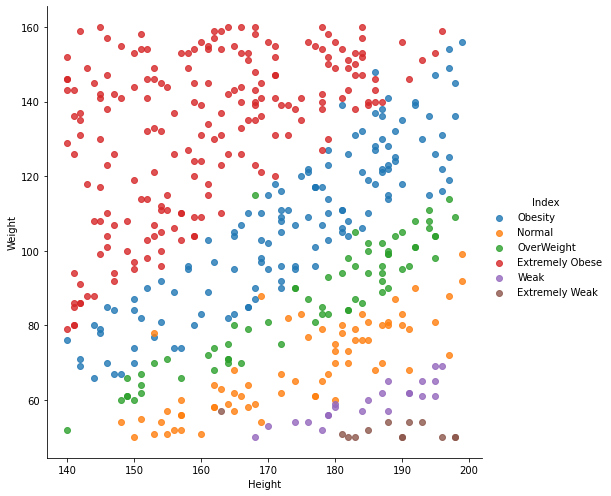

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
print(data.describe())

def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'


data['Index'] = data['Index'].apply(give_names_to_indices)

sns.lmplot('Height','Weight',data,hue='Index',size=7,aspect=1,fit_reg=False)

people = data['Gender'].value_counts()

categories = data['Index'].value_counts()

# STATS FOR MEN
data[data['Gender']=='Male']['Index'].value_counts()

# STATS FOR WOMEN
data[data['Gender']=='Female']['Index'].value_counts()

data2 = pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)

y=data['Index']
data =data.drop(['Index'],axis=1)

scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)

param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)
# weight category prediction
pred = grid_cv.predict(X_test)


print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)
print('\n')

def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])
    


#Live predictor
your_details = ['Male',175,80]
print(lp(your_details))